# Business Problem

Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



## Importing Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier,BaggingClassifier,BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
import warnings 
warnings.filterwarnings('ignore')

## Data collection and Description

In [3]:
fraud = pd.read_csv('Fraud_check.csv')

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Checking size of dataset

In [5]:
fraud.shape

(600, 6)

## Information of dataset

In [6]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


## Columns of dataset

In [7]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

## Checking for duplicated values

In [10]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


##### No duplicated values in the dataset

## Checking for missing data

In [11]:
fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

##### no missing data in the dataset

## Descriptive Statistics

In [12]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [13]:
y1=np.empty(600, dtype=object)
i=0

for value in fraud['Taxable.Income']:
    if value<=30000:
        y1[i]='Risky'
    else:
        y1[i]='Good'
    i=i+1   

##### Income value < 30000 is Risky and >30000 is Good

In [14]:
target=pd.DataFrame(y1,columns=['Target'])
target

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [15]:
fraud =  pd.concat([fraud,target],axis=1)

In [16]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


## Label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder =LabelEncoder()
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 
fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad'])
fraud['Target']= label_encoder.fit_transform(fraud['Target'])

In [18]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


## Visualisations

<Axes: >

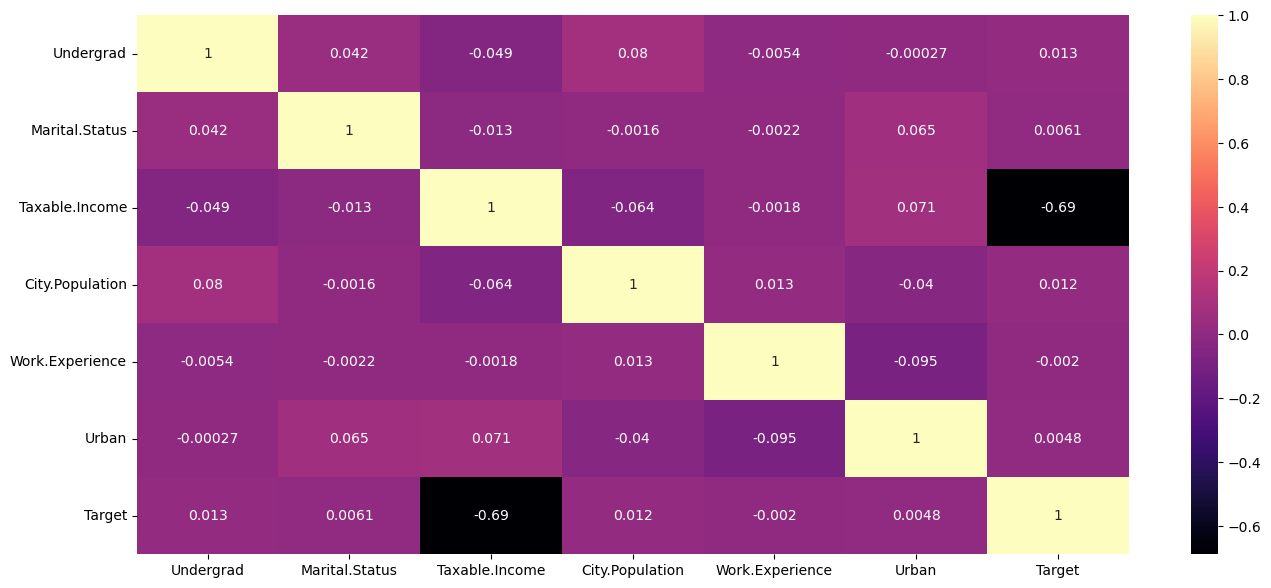

In [22]:
plt.figure(figsize=(16,7))
sns.heatmap(fraud.corr(),cmap='magma',annot=True)

## Checking for outliers using Boxplot

<Axes: >

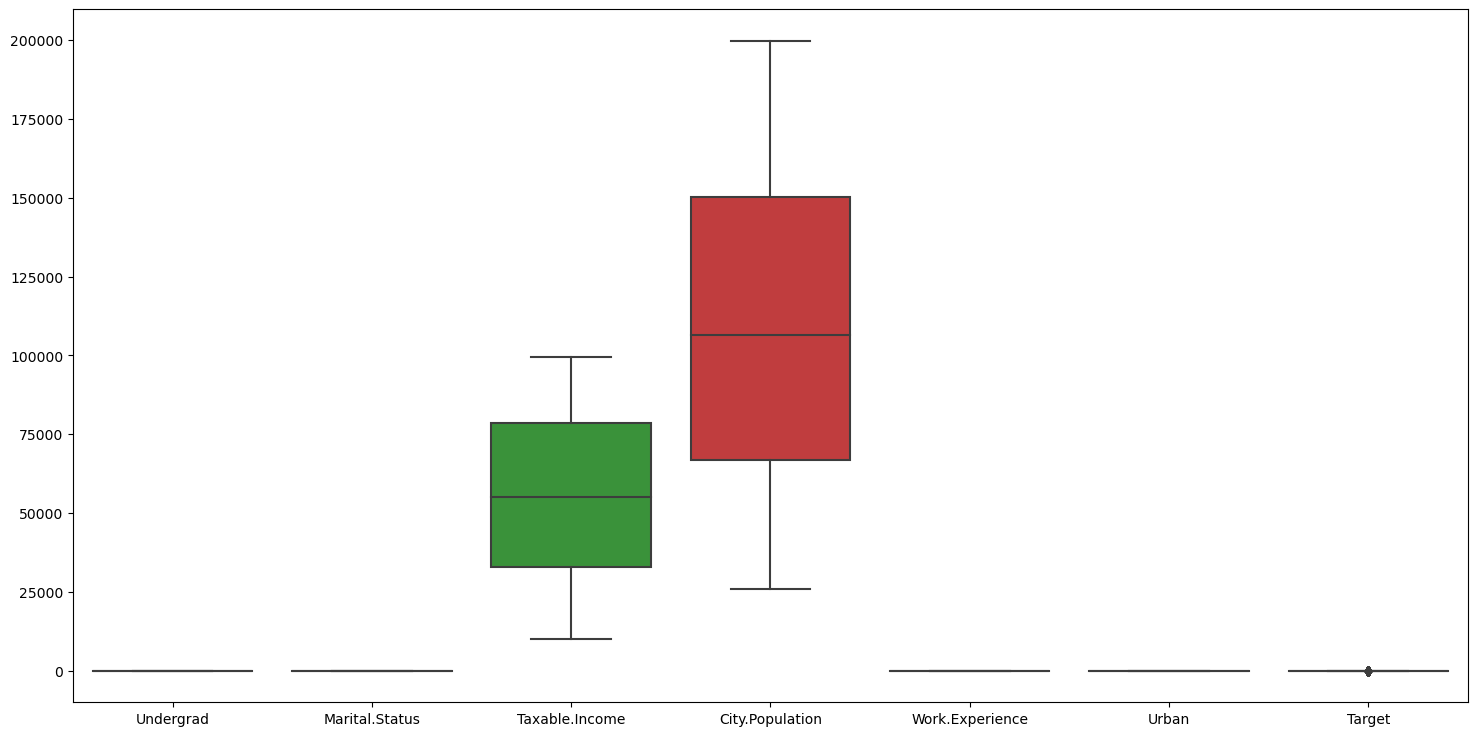

In [23]:
plt.figure(figsize=(18,9))
sns.boxplot(fraud)

## Pairplots

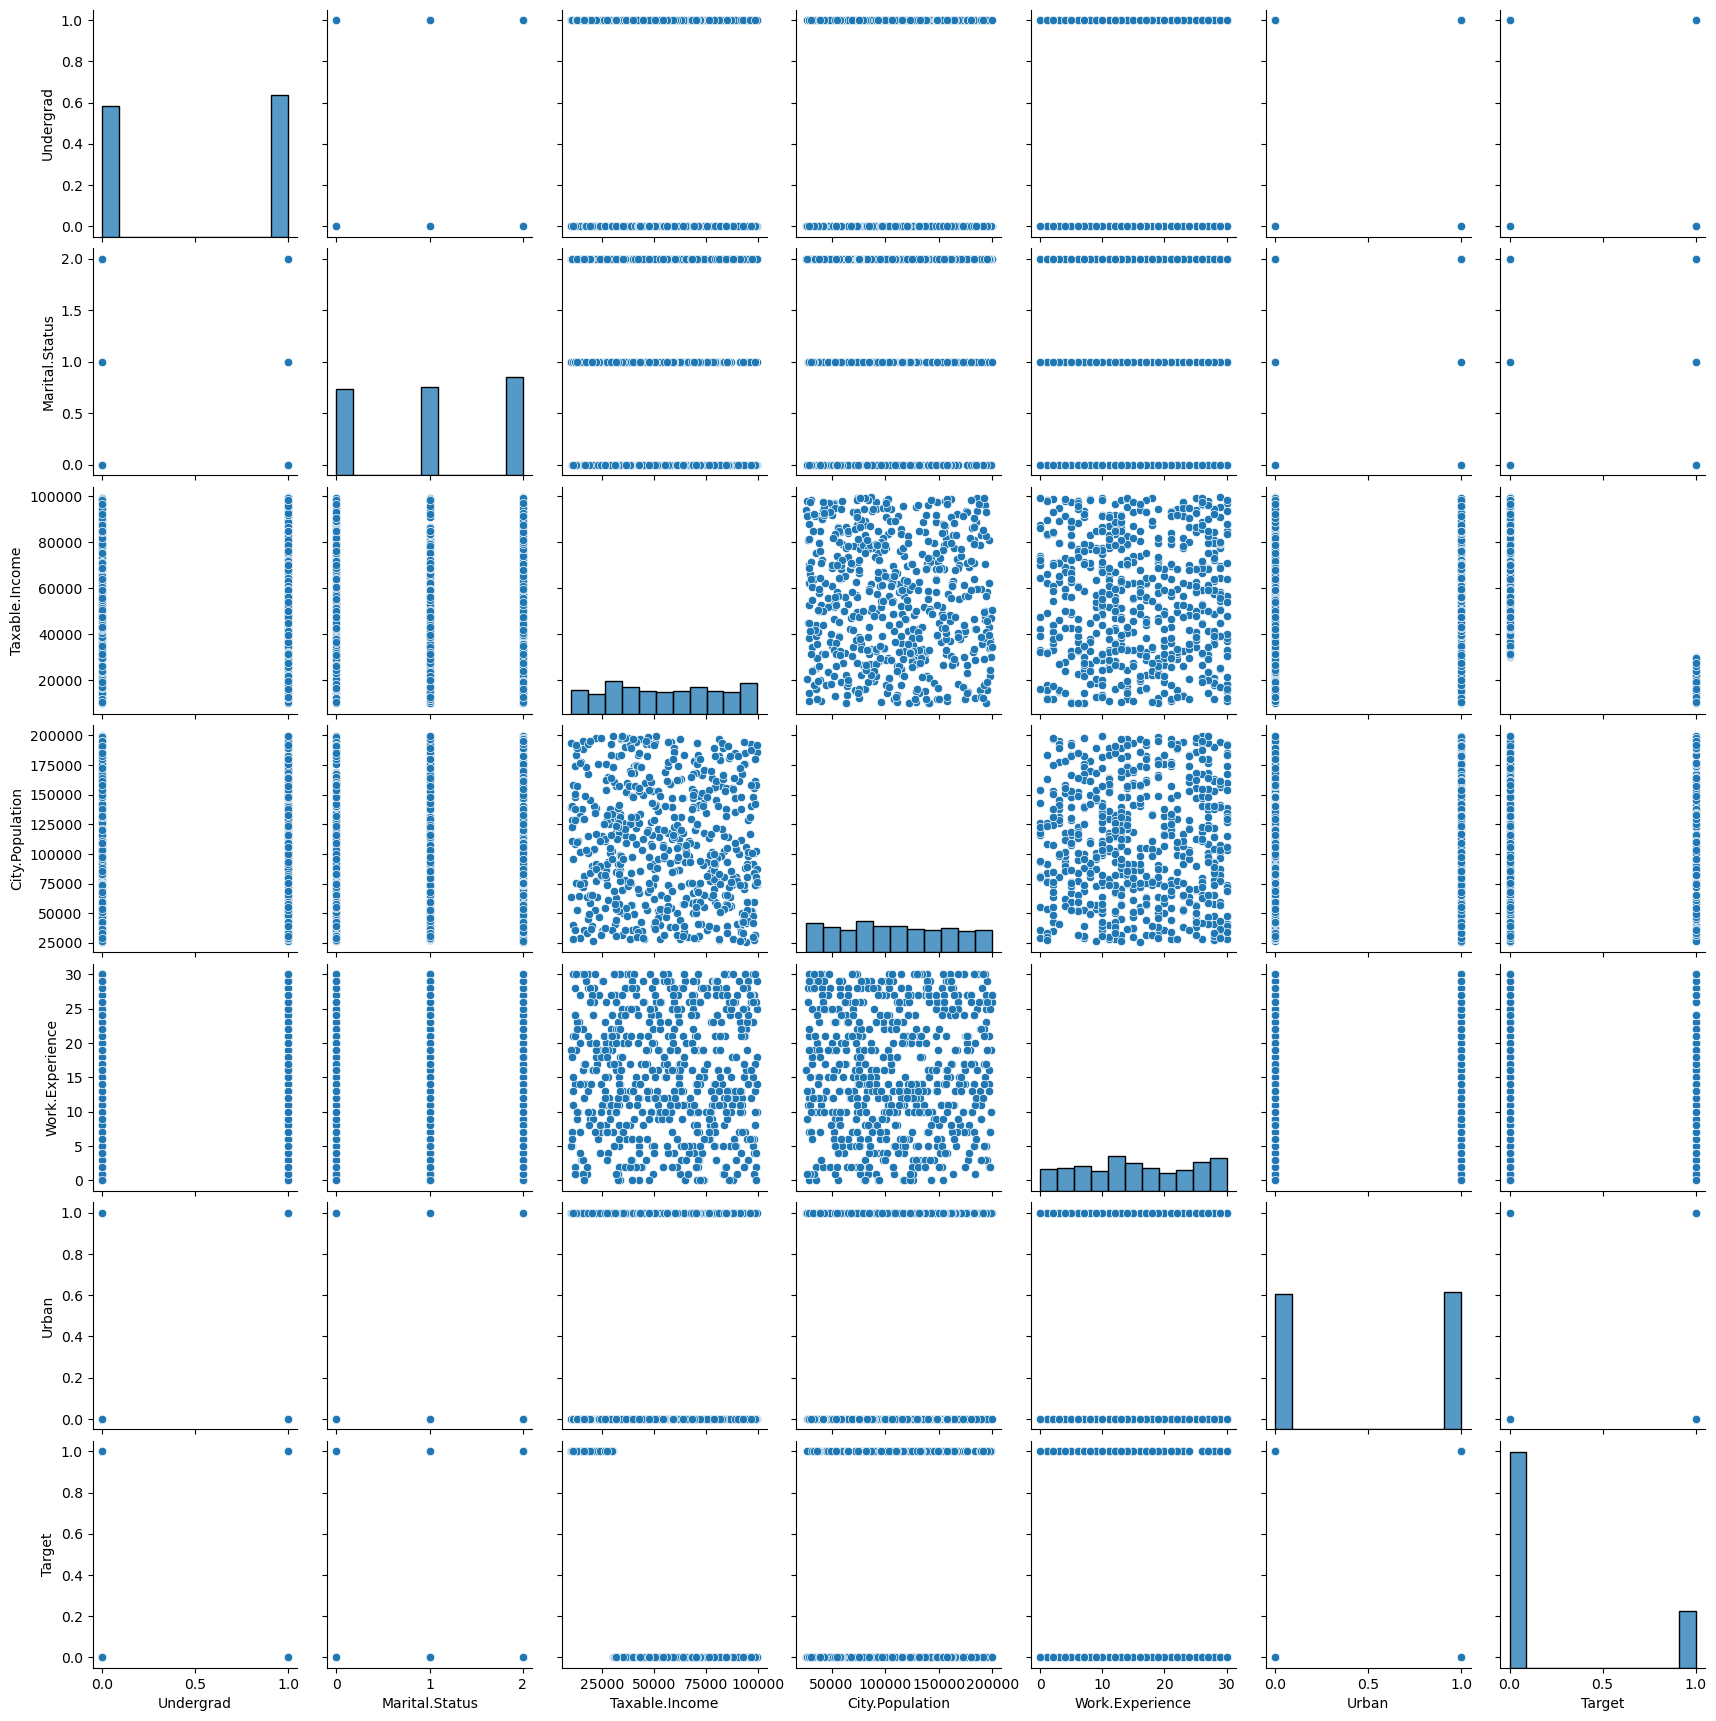

In [24]:
sns.pairplot(fraud)

In [25]:
fraud.sample(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
26,1,0,55299,169128,15,0,0
18,1,0,97957,59269,6,0,0


<Axes: xlabel='Taxable.Income', ylabel='Density'>

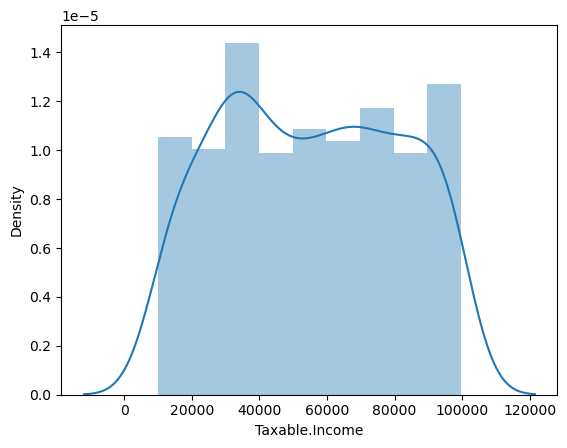

In [27]:
sns.distplot(fraud['Taxable.Income'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

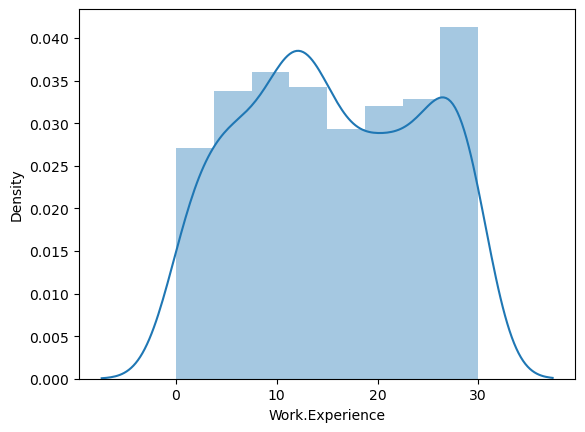

In [28]:
sns.distplot(fraud['Work.Experience'])

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

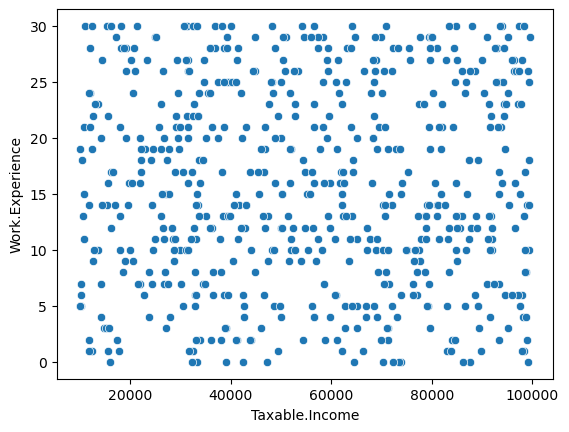

In [29]:
sns.scatterplot(x = 'Taxable.Income', y = 'Work.Experience', data = fraud)

In [66]:
X=fraud.iloc[:,0:6]
y=fraud[['Target']]
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [67]:
print('shapes pf data:',X.shape,y.shape)

shapes pf data: (600, 6) (600, 1)


## Train test splitting

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
print('shape of training and testing data:',X_train.shape,X_test.shape,y_train.shape,y_test.shape)

shape of training and testing data: (480, 6) (120, 6) (480, 1) (120, 1)


## Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [71]:
print(accuracy_score(y_test,y_pred_rf)*100)

100.0


In [72]:
for name, score in zip(fraud.columns, rnd_clf.feature_importances_):
     print(name, score*100)

Undergrad 0.36554247727197925
Marital.Status 0.6935076625235932
Taxable.Income 91.73413887112474
City.Population 4.1837254780599284
Work.Experience 2.6639346389529392
Urban 0.35915087206682156


In [73]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



## Bagging Classifier

In [74]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
 n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1,oob_score=True
 )

In [75]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [76]:
y_pred =bag_clf.predict(X_test)

In [77]:
print(accuracy_score(y_test,y_pred)*100)

100.0


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00        25

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [79]:
bag_clf.oob_score_

0.9979166666666667

In [80]:
bag_clf.oob_decision_function_

array([[4.40393078e-01, 5.59606922e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.99926740e-01, 7.32600733e-05],
       [1.92571785e-02, 9.80742821e-01],
       [9.99738220e-01, 2.61780105e-04],
       [0.00000000e+00, 1.00000000e+00],
       [3.71864656e-02, 9.62813534e-01],
       [9.99634353e-01, 3.65647424e-04],
       [9.98474015e-01, 1.52598535e-03],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [9.97359235e-01, 2.64076484e-03],
       [1.00000000e+00, 0.00000000e+00],
       [9.36998223e-01, 6.30017773e-02],
       [9.74776642e-01, 2.52233576e-02],
       [9.99714286e-01, 2.85714286e-04],
       [9.01902847e-03, 9.90980972e-01],
       [0.00000000e+00, 1.00000000e+00],
       [9.99969633e-01, 3.03674461e-05],
       [3.84838078e-03, 9.96151619e-01],
       [5.71428571e-03, 9.94285714e-01],
       [1.000000

## Checking for overfitting and Underfitting of dataset

In [81]:
print('Training Score:{:.4f}'.format(bag_clf.score(X_train,y_train)))
print('Test Score:{:.4f}'.format(bag_clf.score(X_test,y_test)))

Training Score:1.0000
Test Score:1.0000


## Hyperparameter Tuning using Gridsearchcv

In [82]:
from sklearn.model_selection import GridSearchCV
param_grid={ 
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

reg = GridSearchCV(DecisionTreeClassifier(),param_grid=param_grid,cv=10)
reg.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [83]:
best_params = reg.best_params_
print("Best hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X, y)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


DecisionTreeClassifier()

In [84]:
fraud.sample(4)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
496,1,0,72151,59382,5,1,0
335,1,1,33301,140998,15,0,0
4,0,1,81002,27533,28,0,0
68,0,2,10150,139642,5,0,1


## Kfold Cross validation

In [92]:
num_trees = 65
max_features = 7
kfold = KFold(n_splits=7, random_state=14, shuffle=True)

In [94]:
model3 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model3, X, y, cv=kfold)

In [95]:
print(results.mean())

0.9983388704318937


## Prediction for BaggingClassifier

In [85]:
prediction = pd.DataFrame({"Undergrad":1,"Marital.Status":2,"Taxable.Income":47200,"City.Population":55842,"Work.Experience":10,"Urban":1},index=[1]) 
bag_clf.predict(prediction)
print("The profit will be:",bag_clf.predict(prediction)) 

The profit will be: [0]


###### 0 is Risky and 1 is Good

## Prediction for RandomForest

In [88]:
fraud.sample(1)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Target
257,1,1,54747,31611,17,1,0


In [89]:
prediction = pd.DataFrame({"Undergrad":1,"Marital.Status":1,"Taxable.Income":54747,"City.Population":31611,"Work.Experience":17,"Urban":1},index=[1]) 
rnd_clf.predict(prediction)
print("The profit will be:",rnd_clf.predict(prediction)) 

The profit will be: [0]


##### Predications are giving very accuratly by this model

# ! Thank You